In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customer_booking.csv', encoding='ISO-8859-1')


In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.shape

(50000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [7]:
df.flight_day.value_counts()

Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

In [8]:
df.trip_type.value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [9]:
df.route.value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

/var/folders/yk/mbbrtc1n325dk_tvlpy42nyh0000gn/T/ipykernel_1085/2485359747.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


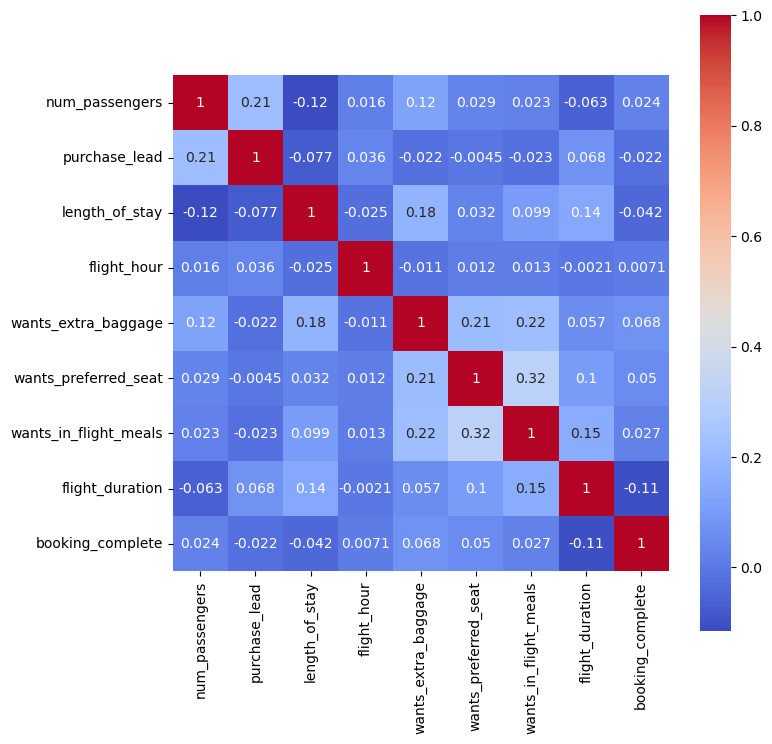

In [10]:
corr=df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,annot=True, square=True,cmap='coolwarm')
plt.show()

In [11]:
df.replace({'Mon': 1,'Tue':2,'Wed':3,"Thu":4,'Fri':5,'Sat':6,'Sun':7},inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()
df1=df.copy()
df1['route_encoded']=le.fit_transform(df1['route'])
df1.drop('route',axis=1)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,route_encoded
0,2,Internet,RoundTrip,262,19,7,6,New Zealand,1,0,0,5.52,0,0
1,1,Internet,RoundTrip,112,20,3,6,New Zealand,0,0,0,5.52,0,0
2,2,Internet,RoundTrip,243,22,17,3,India,1,1,0,5.52,0,0
3,1,Internet,RoundTrip,96,31,4,6,New Zealand,0,0,1,5.52,0,0
4,2,Internet,RoundTrip,68,22,15,3,India,1,0,1,5.52,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,Australia,1,0,1,5.62,0,720
49996,1,Internet,RoundTrip,111,6,4,7,Australia,0,0,0,5.62,0,720
49997,1,Internet,RoundTrip,24,6,22,6,Australia,0,0,1,5.62,0,720
49998,1,Internet,RoundTrip,15,6,11,1,Australia,1,0,1,5.62,0,720


In [17]:
df1=df1.drop('route',axis=1)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   booking_origin         50000 non-null  object 
 8   wants_extra_baggage    50000 non-null  int64  
 9   wants_preferred_seat   50000 non-null  int64  
 10  wants_in_flight_meals  50000 non-null  int64  
 11  flight_duration        50000 non-null  float64
 12  booking_complete       50000 non-null  int64  
 13  route_encoded          50000 non-null  int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 5.3+

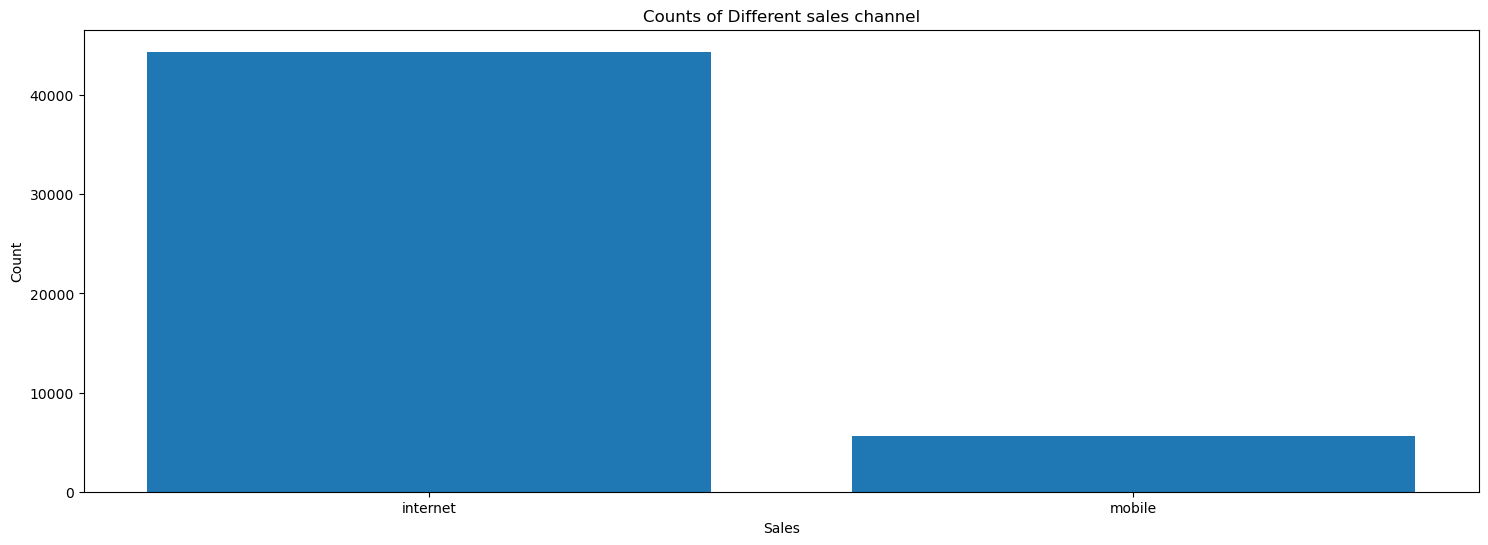

In [20]:
internet=df1[df1['sales_channel']=='Internet']
mobile=df1[df1['sales_channel']=='Mobile']
counts = [internet.shape[0], mobile.shape[0]]
labels = ['internet', 'mobile']

plt.figure(figsize=(18, 6))
plt.bar(labels, counts)
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('Counts of Different sales channel')
plt.show()

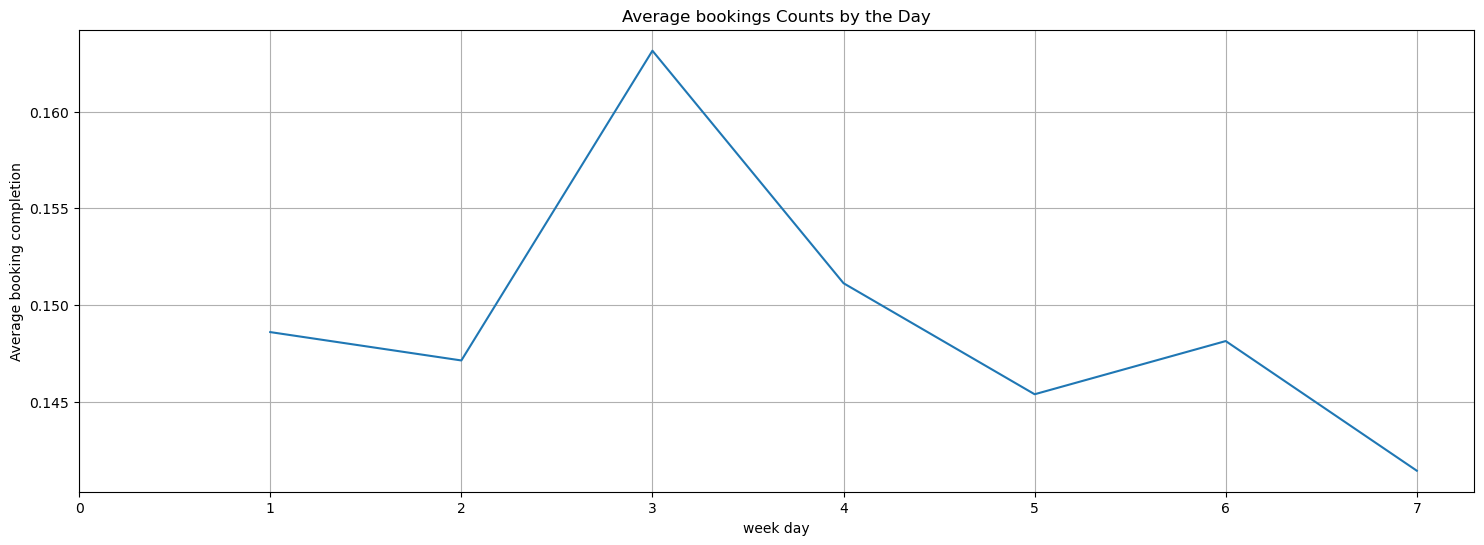

In [23]:
weekly_counts = df1.groupby('flight_day')['booking_complete'].mean().reset_index()

plt.figure(figsize=(18, 6))
sns.lineplot(x='flight_day', y='booking_complete', data=weekly_counts)
plt.xlabel('week day')
plt.ylabel('Average booking completion')
plt.title('Average bookings Counts by the Day')
plt.xticks(ticks=range(8), labels=range(8))
plt.grid()
plt.show()

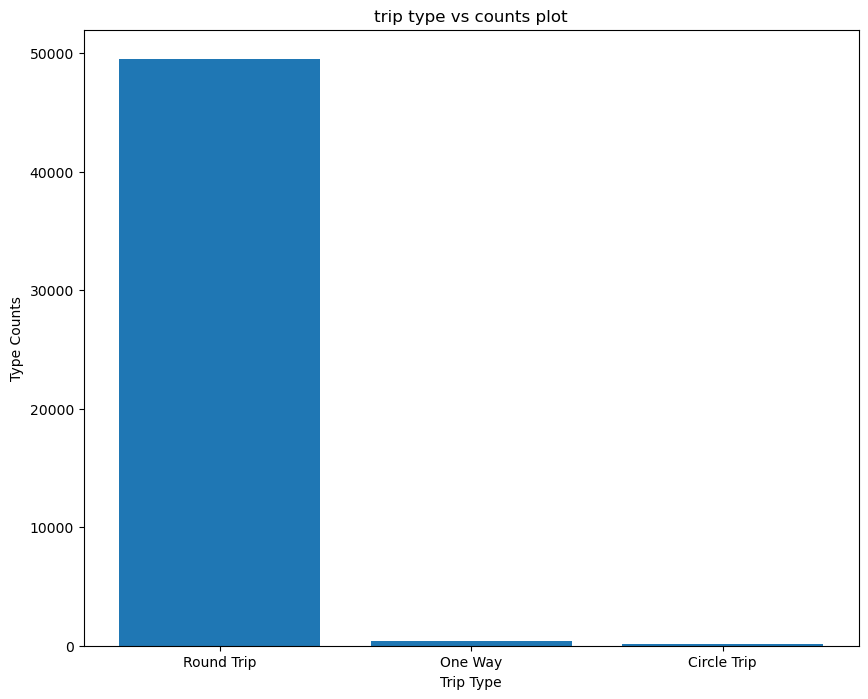

In [30]:
RoundTrip=df1[df1['trip_type']=='RoundTrip']
OneWay=df1[df1['trip_type']=='OneWay']      
CircleTrip=df1[df1['trip_type']=='CircleTrip']
counts=[RoundTrip.shape[0],OneWay.shape[0],CircleTrip.shape[0]]
labels=['Round Trip', 'One Way', 'Circle Trip']
plt.figure(figsize=(10,8))
plt.bar(labels,counts)
plt.xlabel('Trip Type')
plt.ylabel('Type Counts')
plt.title('trip type vs counts plot')
plt.show()

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   trip_type              50000 non-null  object 
 2   purchase_lead          50000 non-null  int64  
 3   length_of_stay         50000 non-null  int64  
 4   flight_hour            50000 non-null  int64  
 5   flight_day             50000 non-null  int64  
 6   booking_origin         50000 non-null  object 
 7   wants_extra_baggage    50000 non-null  int64  
 8   wants_preferred_seat   50000 non-null  int64  
 9   wants_in_flight_meals  50000 non-null  int64  
 10  flight_duration        50000 non-null  float64
 11  booking_complete       50000 non-null  int64  
 12  route_encoded          50000 non-null  int64  
 13  sales_channel_encoded  50000 non-null  int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 5.3+

In [33]:
df1['sales_channel_encoded']=le.fit_transform(df1['sales_channel'])
df1=df1.drop('sales_channel',axis=1)

In [35]:
df1['trip_type_encoded']=le.fit_transform(df1['trip_type'])
df1=df1.drop('trip_type',axis=1)

In [36]:
df1['booking_origin_encoded']=le.fit_transform(df1['booking_origin'])
df1=df1.drop('booking_origin',axis=1)

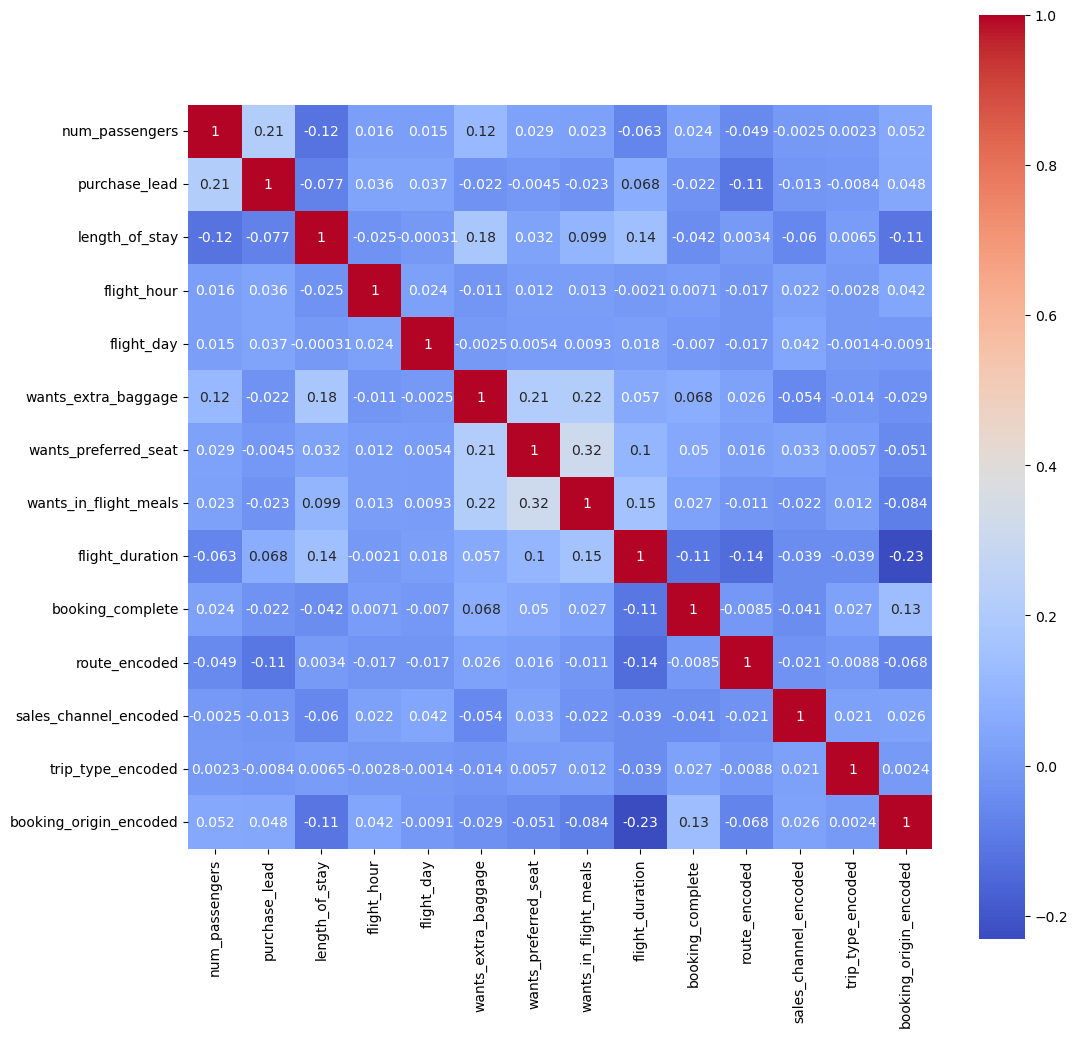

In [38]:
corr=df1.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,square=True,cmap='coolwarm')
plt.show()

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
df1.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,route_encoded,sales_channel_encoded,trip_type_encoded,booking_origin_encoded
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560,391.905800,0.112360,1.987620,38.263340
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643,227.297259,0.315812,0.129873,32.756539
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000,203.000000,0.000000,2.000000,4.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000,381.000000,0.000000,2.000000,37.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000,611.000000,0.000000,2.000000,57.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000,798.000000,1.000000,2.000000,103.000000


In [41]:
df2=(df1-df1.min())/(df1.max()-df1.min())*9+1

In [42]:
df2.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,route_encoded,sales_channel_encoded,trip_type_encoded,booking_origin_encoded
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000
mean,1.665145,1.881735,1.266582,4.547698,5.221630,7.01902,3.67264,4.844260,5.858809,2.346040,5.419990,2.011240,9.94429,4.343399
std,1.147685,0.938942,0.392017,2.117997,2.989188,4.23591,4.11231,4.452011,2.789186,3.209789,2.563503,2.842308,0.58443,2.862222
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
25%,1.000000,1.217993,1.057841,2.956522,2.500000,1.00000,1.00000,1.000000,2.770186,1.000000,3.289474,1.000000,10.00000,1.349515
50%,1.000000,1.529412,1.196658,4.521739,5.500000,10.00000,1.00000,1.000000,6.403727,1.000000,5.296992,1.000000,10.00000,4.233010
75%,2.125000,2.193772,1.323907,6.086957,7.000000,10.00000,10.00000,10.000000,8.751553,1.000000,7.890977,1.000000,10.00000,5.980583
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000


In [43]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_log_error, make_scorer
x=df2.drop('booking_complete',axis=1)
y=df2['booking_complete']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(x_train, y_train)

y_pred = rf_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 85.60%


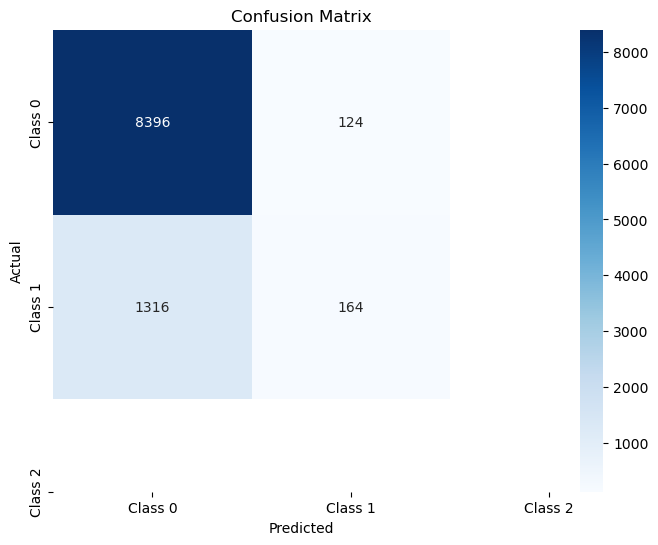

In [49]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'], 
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       0.86      0.99      0.92      8520
        10.0       0.57      0.11      0.19      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.55     10000
weighted avg       0.82      0.86      0.81     10000



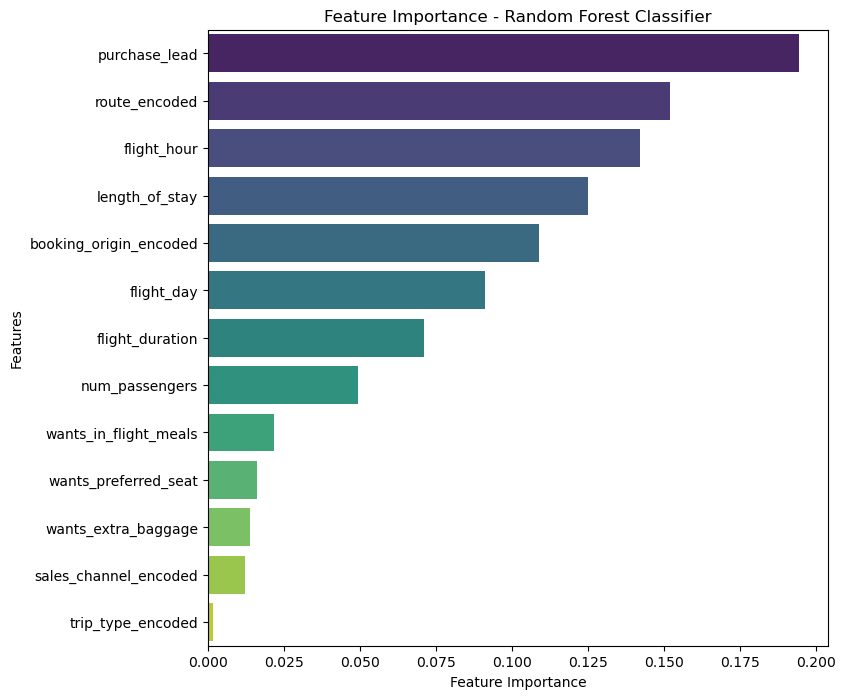

In [52]:

feature_importances = rf_classifier.feature_importances_


feature_names = x_train.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(8, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance - Random Forest Classifier')
plt.show()
